In [1]:
import torch
import torch.nn as nn

In [ ]:
a = (120, 3, 64, 64)
a = torch.randn(a)

In [ ]:
a.shape

torch.Size([120, 3, 64, 64])

In [ ]:
a.reshape(a.shape[0], -1).shape

torch.Size([120, 12288])

In [28]:
class classifier(nn.Module):
  def __init__(self):
    super().__init__()

    # (64 * 64) * 3
    # (32 * 32) * 64
    self.leftConvLayer1 = nn.Sequential(
        nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2),
        nn.Dropout(p = 0.5)
    )
    # (16 * 16) * 32
    self.leftConvLayer2 = nn.Sequential(
        nn.Conv2d(in_channels = 64, out_channels = 32, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2),
        nn.Dropout(p = 0.5)
    )
    # (64 * 64) * 3 --- (32 * 32) * 128
    self.rightConvLayer1 = nn.Sequential(
        nn.Conv2d(in_channels = 3, out_channels = 128, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2),
        nn.Dropout(p = 0.5)
    )
    # (16 * 16) * 64
    self.rightConvLayer2 = nn.Sequential(
        nn.Conv2d(in_channels = 128, out_channels = 64, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2),
        nn.Dropout(p = 0.5)
    )

    self.fc1 = nn.Sequential(
        nn.Linear(in_features = 16 * 16 * 32 + 16 * 16 * 64, out_features = 1024),
        nn.ReLU(),
        nn.Dropout(p = 0.7)
    )

    self.fc2 = nn.Sequential(
        nn.Linear(in_features = 1024, out_features = 128),
        nn.ReLU(),
        nn.Dropout(p = 0.7)
    )

    self.outLayer = nn.Sequential(
        nn.Linear(in_features = 128, out_features = 3),
        nn.Softmax()
    )

  def forward(self, x):
    x1 = self.leftConvLayer1(x)
    x1 = self.leftConvLayer2(x1)
    x1 = x1.reshape(x1.shape[0], -1)


    x2 = self.rightConvLayer1(x)
    x2 = self.rightConvLayer2(x2)
    x2 = x2.reshape(x2.shape[0], -1)

    out = torch.cat((x1, x2), dim = 1)

    return out

In [29]:
model = classifier()

In [30]:
model.parameters

<bound method Module.parameters of classifier(
  (leftConvLayer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.5, inplace=False)
  )
  (leftConvLayer2): Sequential(
    (0): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.5, inplace=False)
  )
  (rightConvLayer1): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.5, inplace=False)
  )
  (rightConvLayer2): Sequential(
    (0): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=F

In [32]:
from torchsummary import summary

In [34]:
summary(model = model, input_size = a.shape[1:])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,792
              ReLU-2           [-1, 64, 64, 64]               0
         MaxPool2d-3           [-1, 64, 32, 32]               0
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]          18,464
              ReLU-6           [-1, 32, 32, 32]               0
         MaxPool2d-7           [-1, 32, 16, 16]               0
           Dropout-8           [-1, 32, 16, 16]               0
            Conv2d-9          [-1, 128, 64, 64]           3,584
             ReLU-10          [-1, 128, 64, 64]               0
        MaxPool2d-11          [-1, 128, 32, 32]               0
          Dropout-12          [-1, 128, 32, 32]               0
           Conv2d-13           [-1, 64, 32, 32]          73,792
             ReLU-14           [-1, 64,

In [31]:
b = model(a)
b.shape

torch.Size([120, 24576])

In [47]:
a = (120, 3, 64, 64)
a = torch.randn(a)

In [6]:
a.shape

torch.Size([120, 3, 64, 64])

In [8]:
a.reshape(a.shape[0], -1).shape

torch.Size([120, 12288])

#Concat

In [36]:
torch_array1 = torch.randn(3, 4)
torch_array1

tensor([[-0.5293, -1.8028, -1.5676, -0.2366],
        [-0.1088,  0.6906,  0.7843,  0.0110],
        [-1.1788,  1.0149,  0.4733, -0.1897]])

In [37]:
torch_array1.shape

torch.Size([3, 4])

In [38]:
torch_array2 = torch.randn(3, 4)
torch_array2

tensor([[-0.6997, -0.8853,  2.0967,  0.2480],
        [ 0.0779, -1.3249,  0.1386, -0.6973],
        [ 1.2399, -0.8816,  0.2463, -0.4146]])

In [40]:
torch_array2.shape

torch.Size([3, 4])

In [42]:
final_array = torch.cat((torch_array1, torch_array2), dim = 1)
final_array

tensor([[-0.5293, -1.8028, -1.5676, -0.2366, -0.6997, -0.8853,  2.0967,  0.2480],
        [-0.1088,  0.6906,  0.7843,  0.0110,  0.0779, -1.3249,  0.1386, -0.6973],
        [-1.1788,  1.0149,  0.4733, -0.1897,  1.2399, -0.8816,  0.2463, -0.4146]])

In [43]:
final_array.shape

torch.Size([3, 8])

In [45]:
final_array2 = torch.concat((torch_array1, torch_array2), dim = 1)
final_array2

tensor([[-0.5293, -1.8028, -1.5676, -0.2366, -0.6997, -0.8853,  2.0967,  0.2480],
        [-0.1088,  0.6906,  0.7843,  0.0110,  0.0779, -1.3249,  0.1386, -0.6973],
        [-1.1788,  1.0149,  0.4733, -0.1897,  1.2399, -0.8816,  0.2463, -0.4146]])

In [46]:
final_array2.shape

torch.Size([3, 8])

In [49]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=34358281c49b9ef92c4baa7e7268bb8af743c7c2e77693fa3873044cb5cbc84f
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [50]:
from torchviz import make_dot

In [54]:
dot = make_dot(b)
dot.render("model_graph1", format="png")

'model_graph1.png'

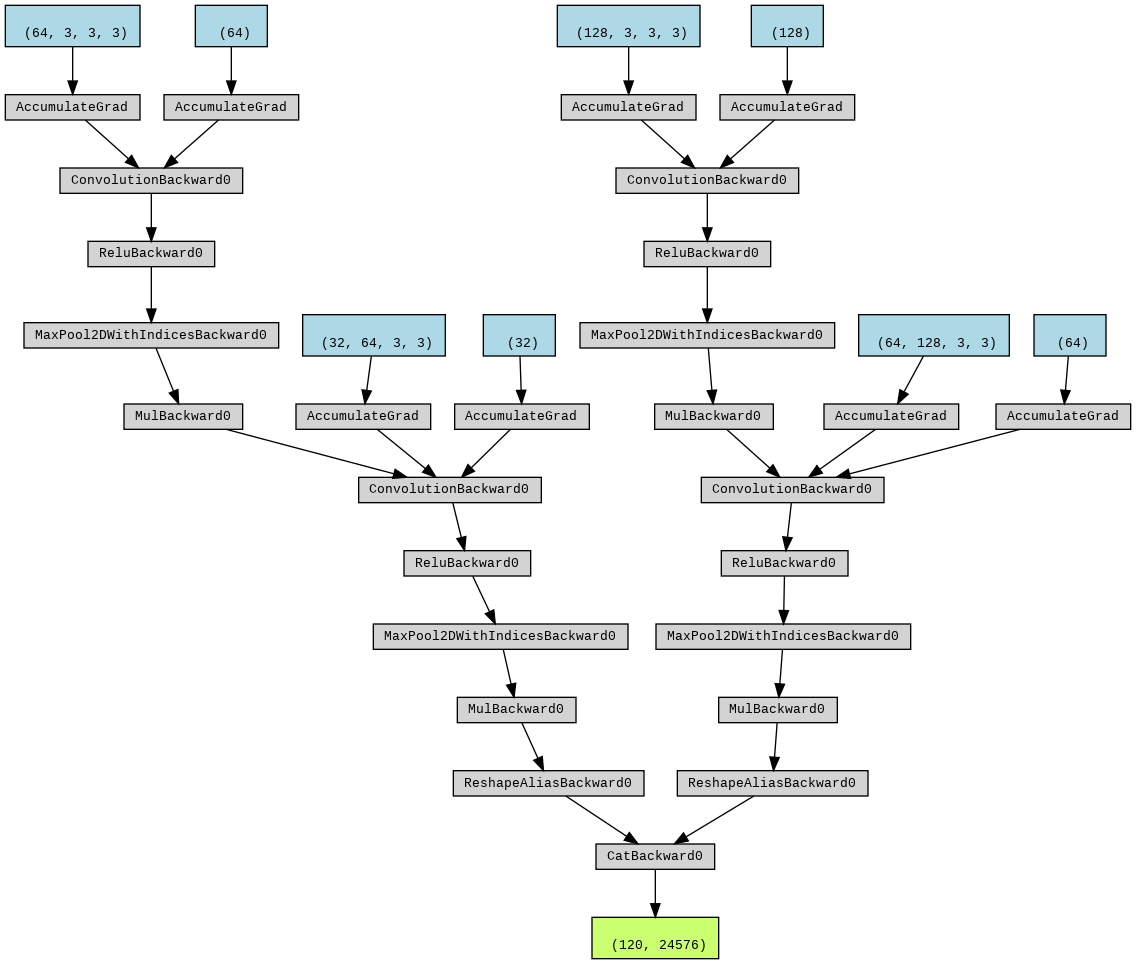

In [57]:
from IPython.display import Image, display

# Display the PNG image directly in the output cell
display(Image(filename='model_graph1.png'))

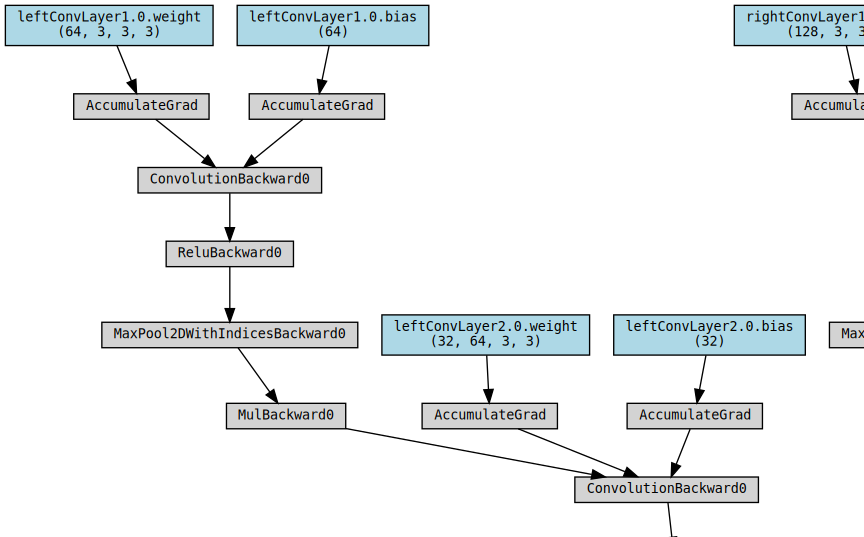

In [52]:
make_dot(model(a), params=dict(model.named_parameters()))